In [3]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 
import seaborn as sns


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA_PL=df[(df['job_country']=='Poland')&(df['job_title_short']=='Data Analyst')]
df_DA_PL


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
584,Data Analyst,Data Quality Analyst,"Kraków, Poland",via LinkedIn,Full-time,False,Poland,2023-02-16 13:24:23,False,False,Poland,None,NaN,NaN,Dyson,"[sap, excel, word]","{'analyst_tools': ['sap', 'excel', 'word']}"
1263,Data Analyst,Data Analyst - Freelance - Portugal/UK/Poland,Poland,via My Stateline Jobs,Contractor,False,Poland,2023-06-29 14:03:32,True,False,Poland,None,NaN,NaN,Global Enterprise Partners,"[python, sql, r]","{'programming': ['python', 'sql', 'r']}"
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
2269,Data Analyst,Analityk Danych (Data Analyst),"Warsaw, Poland",via The:Protocol,Full-time,False,Poland,2023-11-23 13:21:09,True,False,Poland,None,NaN,NaN,AASA POLSKA S.A.,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784713,Data Analyst,Data & Analytics Manager,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-25 06:23:30,True,False,Poland,None,NaN,NaN,NatWest Polska,[tableau],{'analyst_tools': ['tableau']}
785012,Data Analyst,CRM Data Analyst,Poland,via Adzuna.pl,Full-time,False,Poland,2023-01-14 06:21:29,False,False,Poland,None,NaN,NaN,Nestle,"[sql, sap, power bi, excel]","{'analyst_tools': ['sap', 'power bi', 'excel']..."
785052,Data Analyst,Analityk Big Data,"Kraków, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:43,True,False,Poland,None,NaN,NaN,InPost,"[sql, python, databricks, snowflake, azure, sp...","{'cloud': ['databricks', 'snowflake', 'azure']..."
785474,Data Analyst,Sustainable Sourcing Data Analyst,"Warsaw, Poland",via Linkedin,Full-time,False,Poland,2023-01-04 15:44:44,True,False,Poland,None,NaN,NaN,Mars,"[sap, power bi]","{'analyst_tools': ['sap', 'power bi']}"


In [18]:
print(df_DA_PL['job_work_from_home'].unique())
print(df_DA_PL['job_no_degree_mention'].unique())
print(df_DA_PL['job_health_insurance'].unique())

[False  True]
[False  True]
[False]


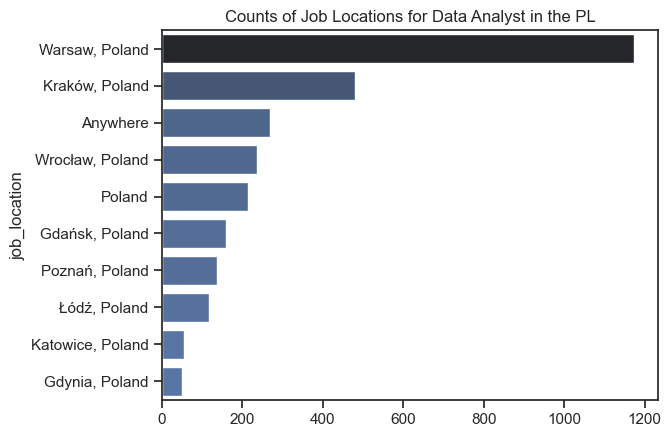

In [ ]:
df_plot=df_DA_PL['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Job Locations for Data Analyst in the PL')
plt.xlabel('Number of Jobs')
plt.xlabel('')
plt.show()

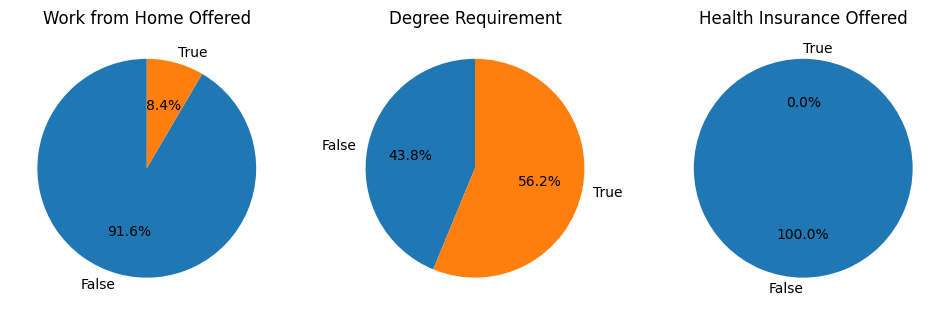

In [23]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create subplots
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

# Plotting the pie charts
for i, (column, title) in enumerate(dict_column.items()):
    # Count the values of True/False and ensure both are present by reindexing
    value_counts = df_DA_PL[column].value_counts()
    value_counts = value_counts.reindex([False, True], fill_value=0)
    
    # Create the pie chart
    ax[i].pie(value_counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# Display the plots
plt.show()

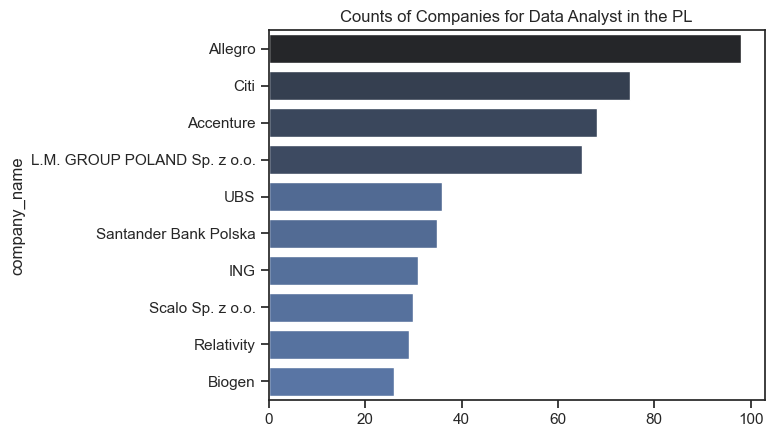

In [24]:
df_plot=df_DA_PL['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Counts of Companies for Data Analyst in the PL')
plt.xlabel('Number of Jobs')
plt.xlabel('')
plt.show()